In [8]:
import pandas as pd
from sklearn import feature_selection
from feature_engine.encoding import OneHotEncoder
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from sklearn import pipeline
from sklearn import cluster
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("C:/Users/Mariana Moledo/Documents/GitHub/tcc_mba_cd/datasets/bd_alunos_evadidos.csv",sep=';', encoding='utf-8')
df.columns

Index(['Unnamed: 0', 'CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM',
       'ENEMHUMANAS', 'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO', 'NOME_CURSO', 'cep_destino', 'AREACURSO',
       'DISTANCIA_NUM'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0                 int64
CODALUNO                   int64
ACAOAFIRMATIVA            object
ENEMLINGUAGEM            float64
ENEMHUMANAS              float64
ENEMNATURAIS             float64
ENEMMATEMATICA           float64
ENEMREDACAO              float64
CURSO                      int64
CODTURNOINGRESSO           int64
CODTURNOATUAL              int64
TURNOATUAL                object
CR                       float64
DISCIPLINA                object
NOTADISC                   int64
RESULTDISC                 int64
PERIODODISC                int64
ANOINGRESSO                int64
SEMESTREINGRESSO           int64
ANODESVINCULACAO           int64
SEMESTREDESVINCULACAO      int64
IDADE                      int64
COR                       object
BAIRRO                    object
CEP                       object
CIDADE                    object
MOBILIDADE                 int64
CHCURSADA                  int64
ESTADOCIVIL               object
TRANCAMENTOS               int64
TEMPOPERMA

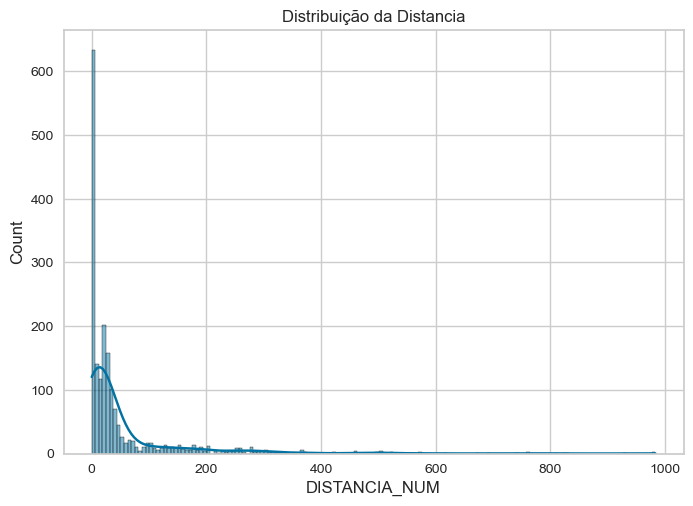

In [11]:
sns.histplot(data=df['DISTANCIA_NUM'], kde=True)
plt.title('Distribuição da Distancia')
plt.show()